In [1]:
import random
import matplotlib.pyplot as plt
import statistics

In [2]:

# appends zero to the beginning an the rear of the array
def addzeros(a,num=20):
    anslist=[]
    anslist=[0]*num+a+[0]*num
    return anslist

# returns the standard deviation of a list
def getstdev(inlist,interval=3):
    anslist=[]
    for i in range(len(inlist)-interval+1):
        inter=inlist[i:i+interval]
        anslist.append(statistics.stdev(inter))
    return anslist

# F funciton defined in arching inx 2, 2*median - (max+min)
def functionf(inlist,interval=3):
    anslist=[]
    for i in range(len(inlist)-interval+1):
        inter=inlist[i:i+interval]

        ans=2*statistics.median(inter)-max(inter)-min(inter)
        
        anslist.append(ans)
    return anslist

# step funciton
def stepfunction(x,c):
    if x<c:
        return 1
    else:
        return 0



<function matplotlib.pyplot.show(close=None, block=None)>

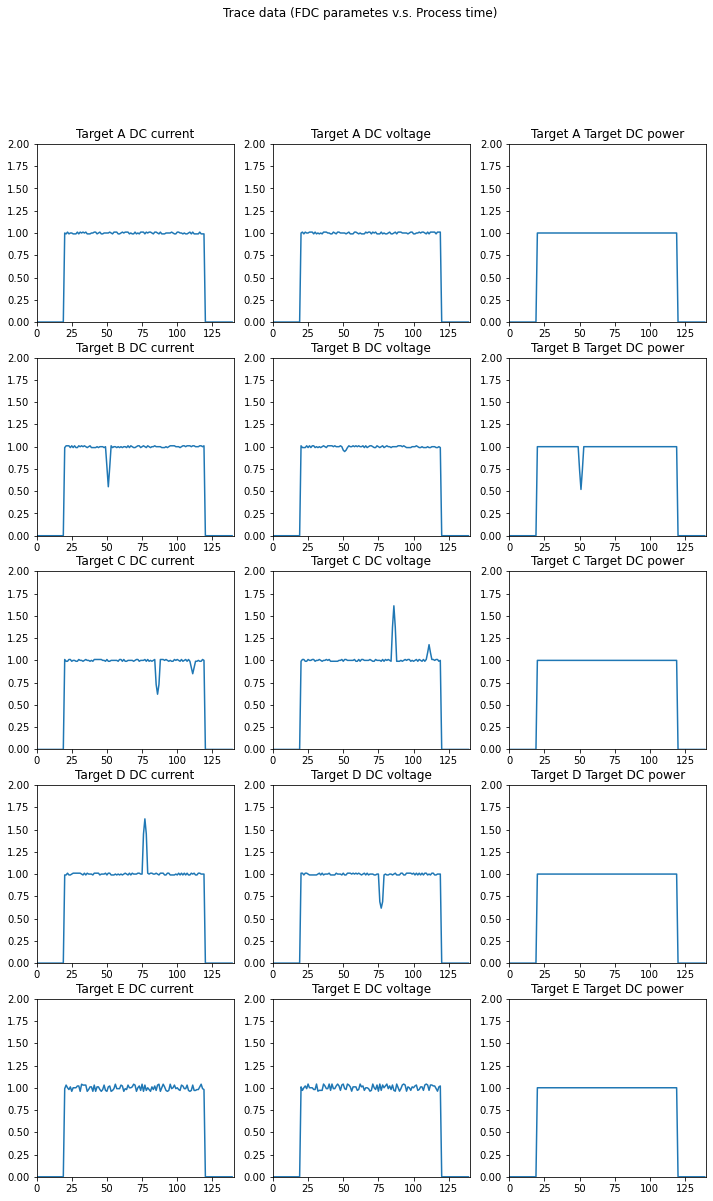

In [7]:
# this is the trance data consturction area
patterns ={'A':0,'B':0,'C':0,'D':0,'E':0}
patterns['A']=[[],[0]*100,[]]
patterns['B']=[[],[0]*100,[]]
patterns['C']=[[],[0]*100,[]]
patterns['D']=[[],[0]*100,[]]
patterns['E']=[[],[0]*100,[]]

#construct the A pattern:

for j in range(100):
    patterns['A'][0].append(random.randint(99,101)/100)

for i in range(100):
    patterns['A'][2].append(1)

for i in range(len(patterns['A'][0])):
        patterns['A'][1][i]=patterns['A'][2][i]/patterns['A'][0][i]

#constuct the B pattern:
for j in range(100):
    patterns['B'][0].append(random.randint(99,101)/100)

for i in range(100):
    patterns['B'][2].append(1)

patterns['B'][0][30]=0.77
patterns['B'][0][31]=0.55
patterns['B'][0][32]=0.77

patterns['B'][2][30]=0.74
patterns['B'][2][31]=0.52
patterns['B'][2][32]=0.74

for i in range(len(patterns['B'][0])):
    if(patterns['B'][0][i] == 0):
        patterns['B'][1][i]=0
    else :
        patterns['B'][1][i]=patterns['B'][2][i]/patterns['B'][0][i]

#construct the C pattern

for j in range(100):
    patterns['C'][0].append(random.randint(99,101)/100)

for i in range(100):
    patterns['C'][2].append(1)

patterns['C'][0][65]=0.73
patterns['C'][0][66]=0.62
patterns['C'][0][67]=0.73
patterns['C'][0][90]=0.92
patterns['C'][0][91]=0.85
patterns['C'][0][92]=0.92

for i in range(len(patterns['C'][0])):
    if(patterns['C'][0][i] == 0):
        patterns['C'][1][i]=0
    else :
        patterns['C'][1][i]=patterns['C'][2][i]/patterns['C'][0][i]

#construct the D pattern

for j in range(100):
    patterns['D'][0].append(random.randint(99,101)/100)

for i in range(100):
    patterns['D'][2].append(1)

patterns['D'][0][56]=1.45
patterns['D'][0][57]=1.62
patterns['D'][0][58]=1.45

for i in range(len(patterns['C'][0])):
    if(patterns['D'][0][i] == 0):
        patterns['D'][1][i]=0
    else :
        patterns['D'][1][i]=patterns['D'][2][i]/patterns['D'][0][i]

#construct the E pattern:

for j in range(100):
    patterns['E'][0].append(random.randint(96,104)/100)

for i in range(100):
    patterns['E'][2].append(1)

for i in range(len(patterns['E'][0])):
        patterns['E'][1][i]=patterns['E'][2][i]/patterns['E'][0][i]


figure, axis = plt.subplots(5,3)
indextoalpha=['A','B','C','D','E']
for i in range(5):
    axis[i,0].plot(addzeros(patterns[indextoalpha[i]][0]))
    axis[i,0].axis([0,140,0,2])
    axis[i,0].set_title("Target "+indextoalpha[i]+" DC current")


    axis[i,1].plot(addzeros(patterns[indextoalpha[i]][1]))
    axis[i,1].axis([0,140,0,2])
    axis[i,1].set_title("Target "+indextoalpha[i]+" DC voltage")
    axis[i,2].plot(addzeros(patterns[indextoalpha[i]][2]))
    axis[i,2].axis([0,140,0,2])
    axis[i,2].set_title("Target "+indextoalpha[i]+" Target DC power")


figure.set_size_inches(12,19)
figure.suptitle('Trace data (FDC parametes v.s. Process time)')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

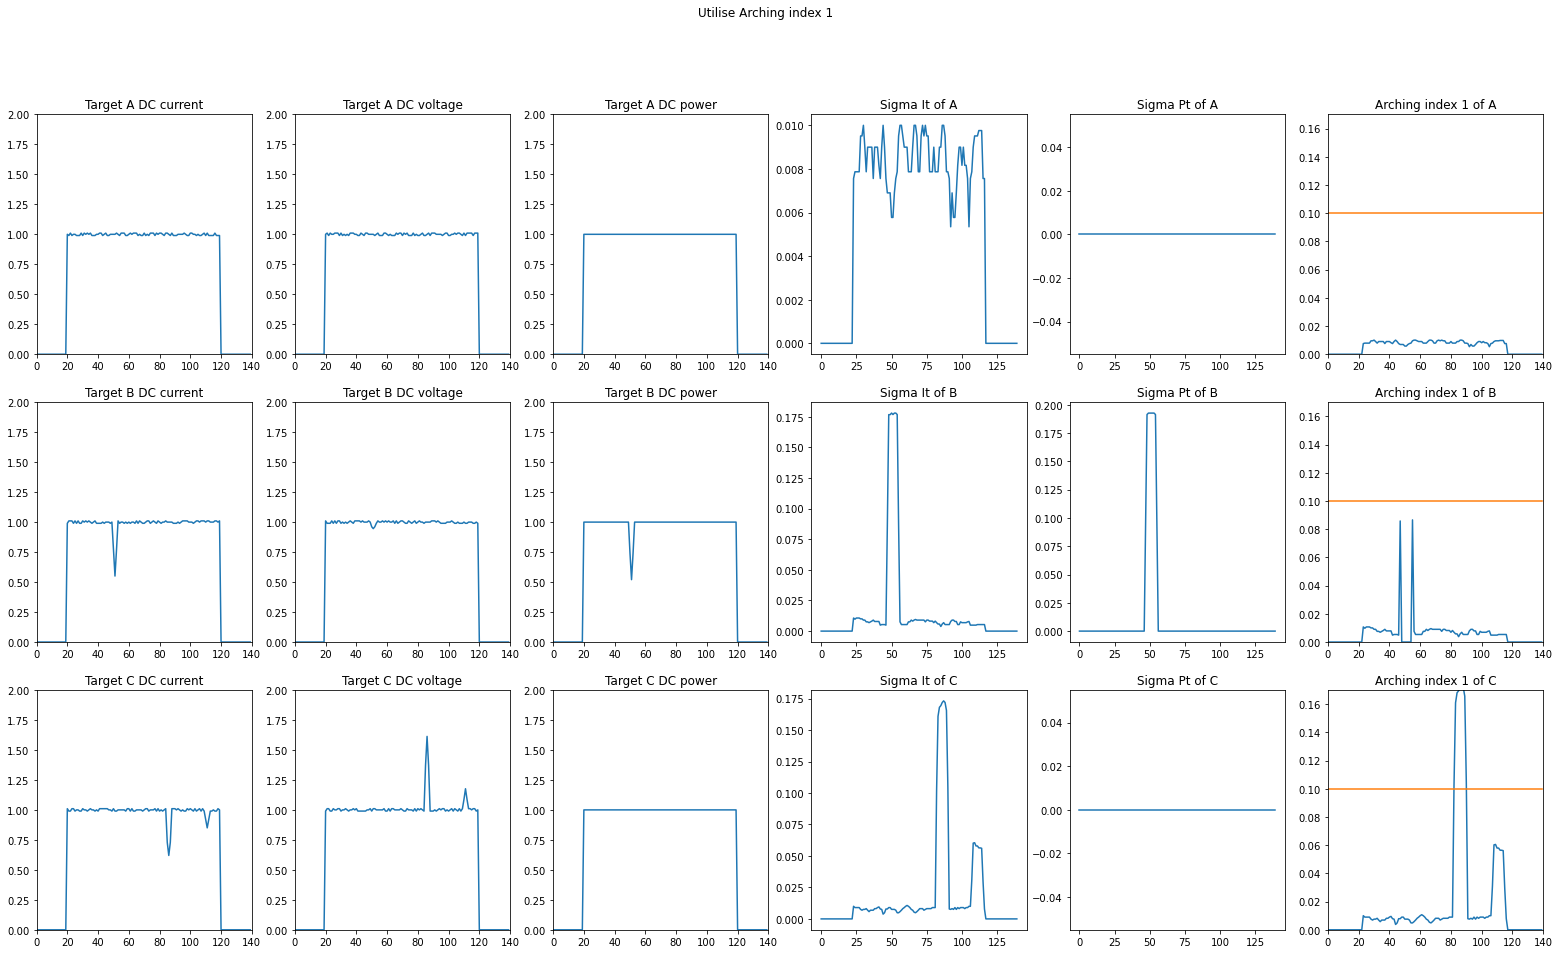

In [8]:

# creating the plot of arching indx 1(A,B,C pattern)
# the data was collected at 1HZ, no prblem occured
# Arcing idx 1 = std(It)*Hc(std(Pt))

# the interval in picked as 7 (magic nubmer)
figure, axis = plt.subplots(3,6)
for idx in range(3):
    pta= patterns[indextoalpha[idx]]
    sigmait=getstdev(pta[0],interval=7)
    sigmapt=getstdev(pta[2],interval=7)

    archingindex1=[]
    for i in range(len(sigmait)):
        archingindex1.append(sigmait[i]*stepfunction(sigmapt[i],0.1))

    axis[idx,0].plot(addzeros(pta[0]))
    axis[idx,0].axis([0,140,0,2])
    axis[idx,0].set_title("Target "+indextoalpha[idx]+" DC current")
    axis[idx,1].plot(addzeros(pta[1]))
    axis[idx,1].axis([0,140,0,2])
    axis[idx,1].set_title("Target "+indextoalpha[idx]+" DC voltage")
    axis[idx,2].plot(addzeros(pta[2]))
    axis[idx,2].axis([0,140,0,2])
    axis[idx,2].set_title("Target "+indextoalpha[idx]+" DC power")
    axis[idx,3].plot(addzeros(sigmait,23))
    axis[idx,3].set_title("Sigma It of "+indextoalpha[idx])
    axis[idx,4].plot(addzeros(sigmapt,23))
    axis[idx,4].set_title("Sigma Pt of "+indextoalpha[idx])
    axis[idx,5].plot(addzeros(archingindex1,23))
    axis[idx,5].plot([0.1]*140)
    axis[idx,5].axis([0,140,0,0.17])
    axis[idx,5].set_title("Arching index 1 of "+indextoalpha[idx])

figure.set_size_inches(27,15)
figure.suptitle('Utilise Arching index 1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

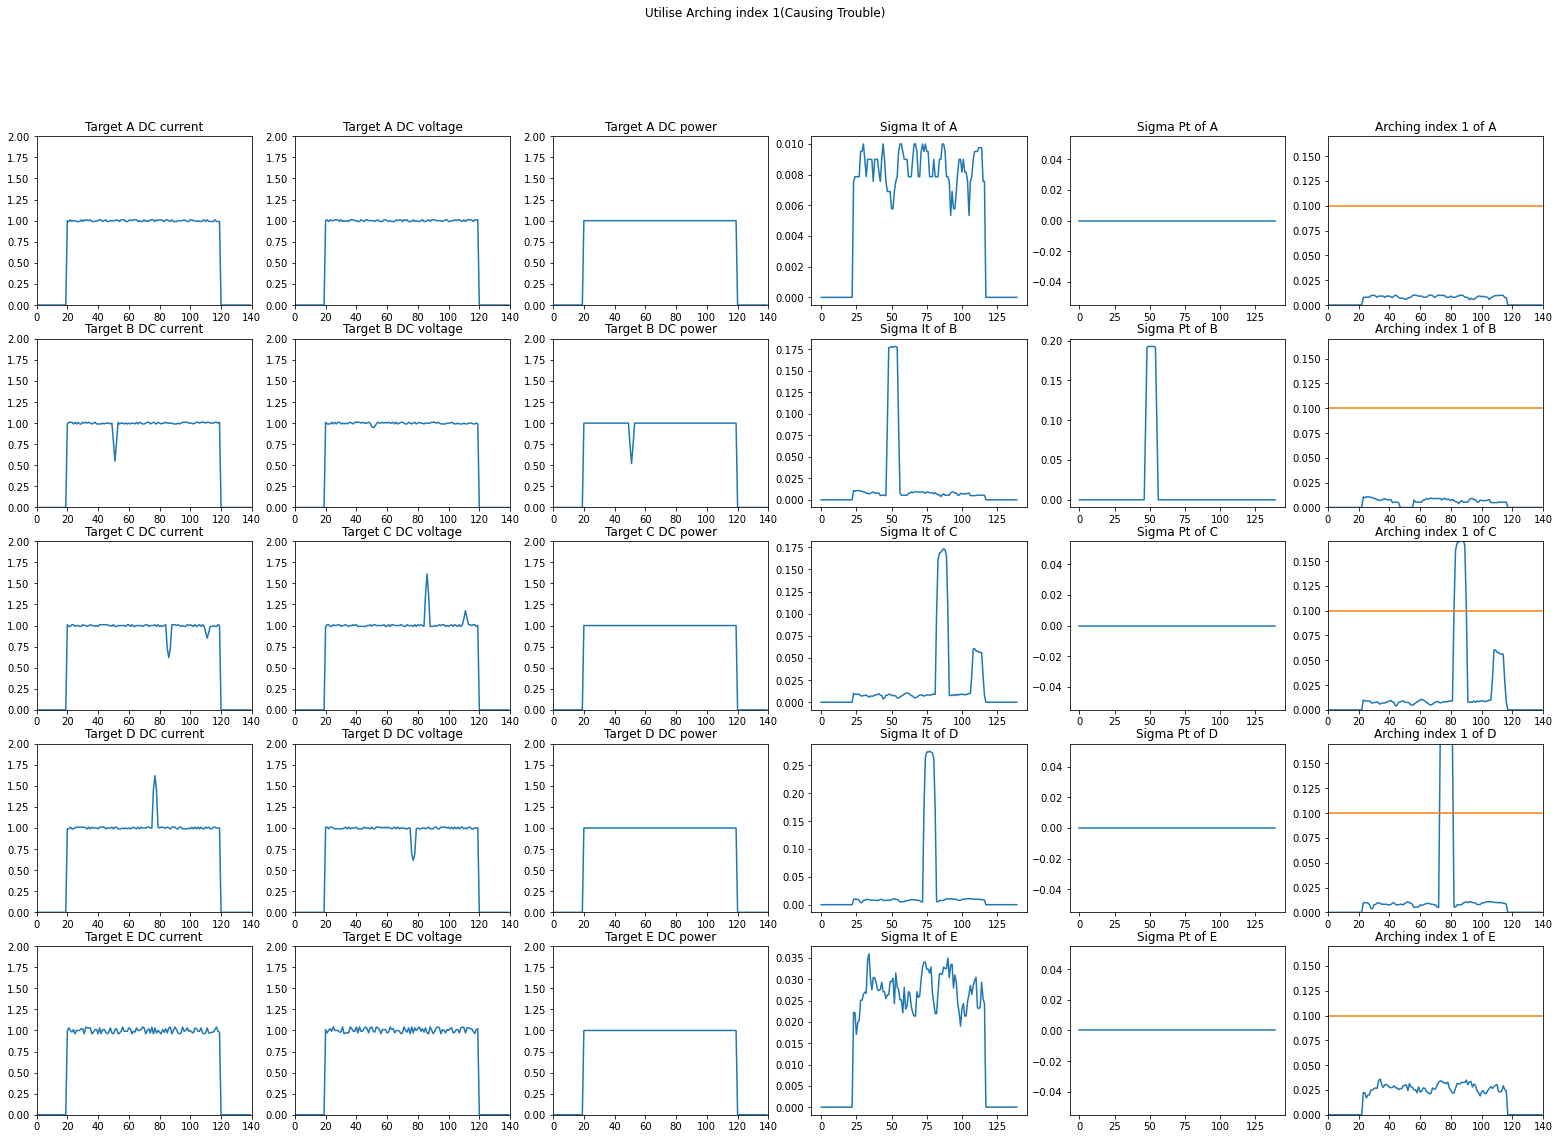

In [12]:
# creating the plot of arching indx 1 (A,B,C,D,E pattern)
# the data was collected at 4HZ, problems occured, C and D cannot be tell apart
# Arcing idx 1 = std(It)*Hc(std(Pt))


figure, axis = plt.subplots(5,6)
for idx in range(5):
    pta= patterns[indextoalpha[idx]]
    sigmait=getstdev(pta[0],interval=7)
    sigmapt=getstdev(pta[2],interval=7)

    archingindex1=[]
    for i in range(len(sigmait)):
        archingindex1.append(sigmait[i]*stepfunction(sigmapt[i],0.05))

    axis[idx,0].plot(addzeros(pta[0]))
    axis[idx,0].axis([0,140,0,2])
    axis[idx,0].set_title("Target "+indextoalpha[idx]+" DC current")
    axis[idx,1].plot(addzeros(pta[1]))
    axis[idx,1].axis([0,140,0,2])
    axis[idx,1].set_title("Target "+indextoalpha[idx]+" DC voltage")
    axis[idx,2].plot(addzeros(pta[2]))
    axis[idx,2].axis([0,140,0,2])
    axis[idx,2].set_title("Target "+indextoalpha[idx]+" DC power")
    axis[idx,3].plot(addzeros(sigmait,23))
    axis[idx,3].set_title("Sigma It of "+indextoalpha[idx])
    axis[idx,4].plot(addzeros(sigmapt,23))
    axis[idx,4].set_title("Sigma Pt of "+indextoalpha[idx])
    axis[idx,5].plot(addzeros(archingindex1,23))
    axis[idx,5].plot([0.1]*140)
    axis[idx,5].axis([0,140,0,0.17])
    axis[idx,5].set_title("Arching index 1 of "+indextoalpha[idx])

figure.set_size_inches(27,18)
figure.suptitle('Utilise Arching index 1(Causing Trouble)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

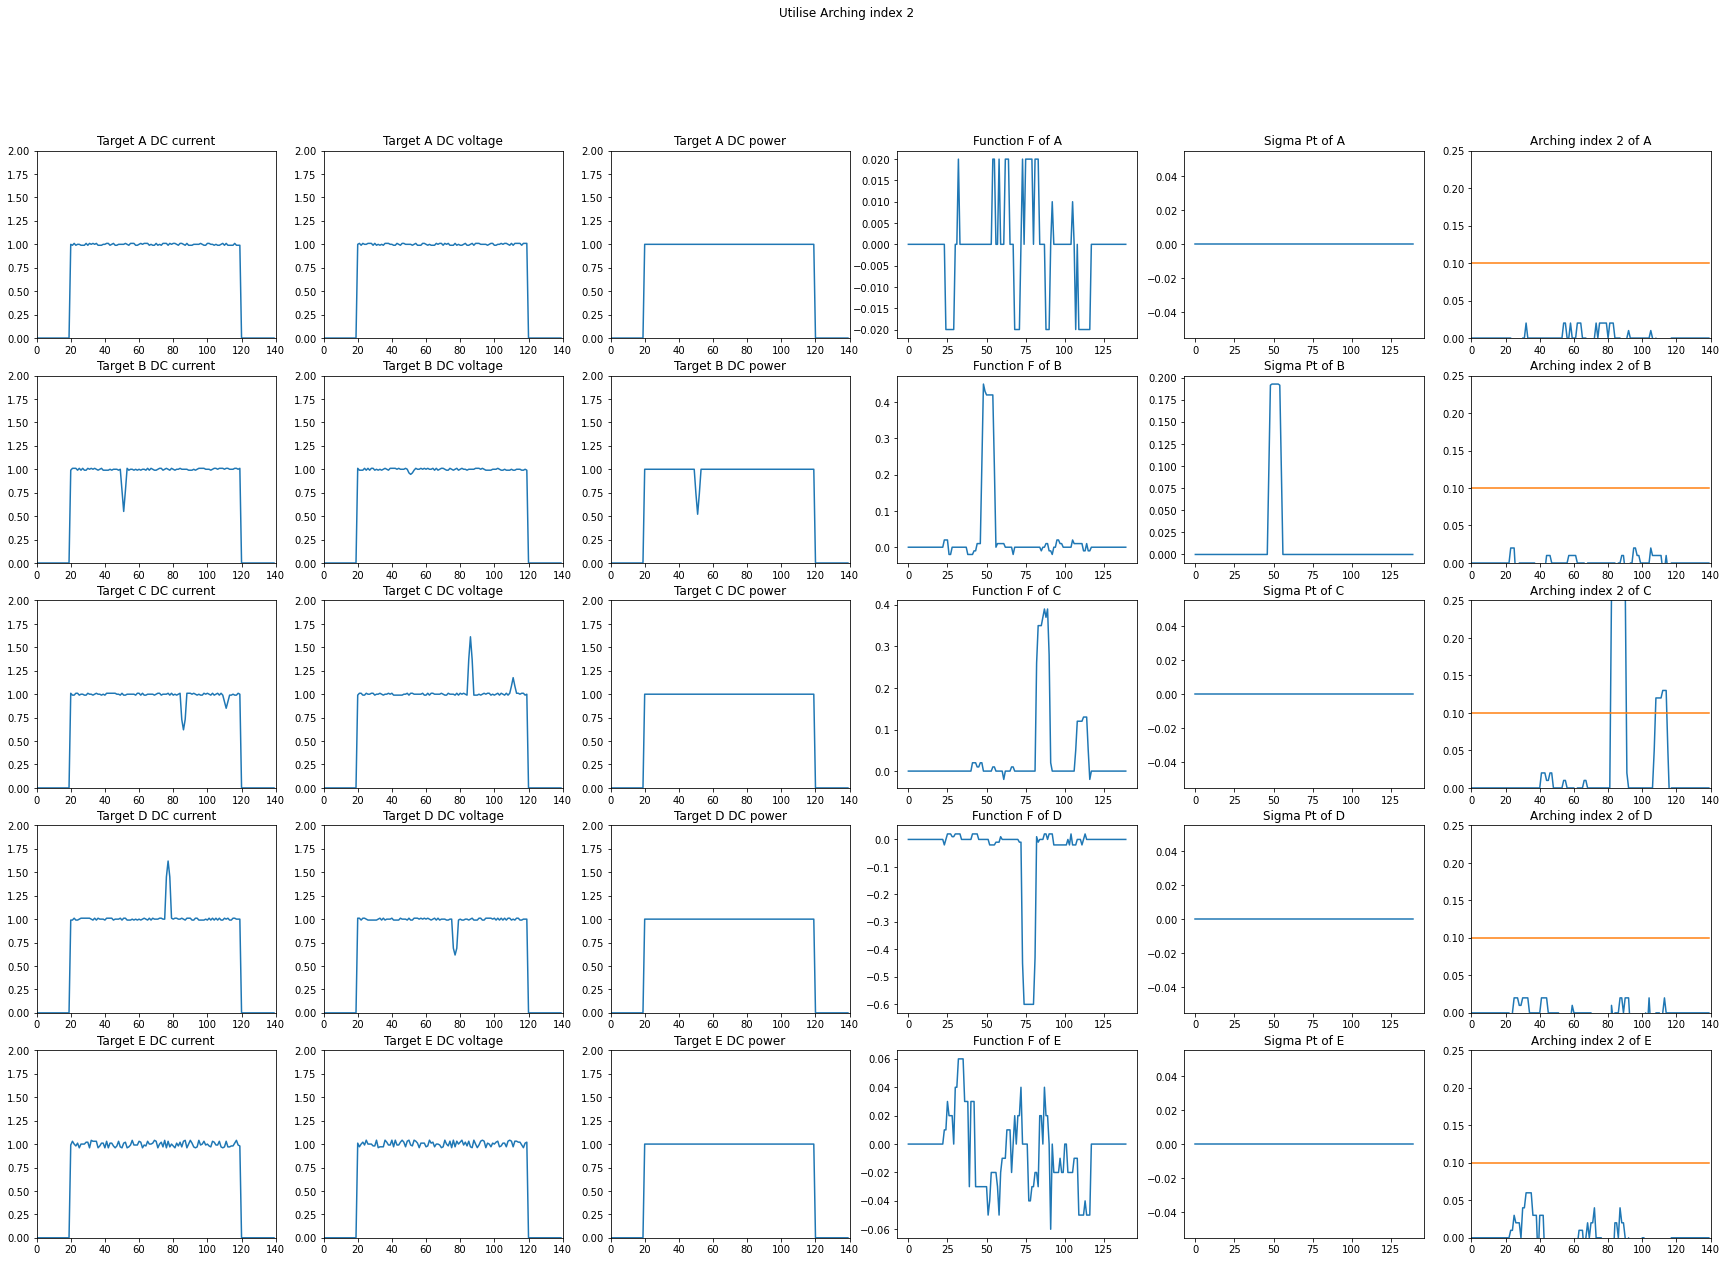

In [10]:

figure, axis = plt.subplots(5,6)
for idx in range(5):
    pta= patterns[indextoalpha[idx]]
    sigmait=functionf(pta[0],interval=7)
    
    sigmapt=getstdev(pta[2],interval=7)

    archingindex1=[]
    for i in range(len(sigmait)):
        archingindex1.append(sigmait[i]*stepfunction(sigmapt[i],0.05))

    axis[idx,0].plot(addzeros(pta[0]))
    axis[idx,0].axis([0,140,0,2])
    axis[idx,0].set_title("Target "+indextoalpha[idx]+" DC current")
    axis[idx,1].plot(addzeros(pta[1]))
    axis[idx,1].axis([0,140,0,2])
    axis[idx,1].set_title("Target "+indextoalpha[idx]+" DC voltage")
    axis[idx,2].plot(addzeros(pta[2]))
    axis[idx,2].axis([0,140,0,2])
    axis[idx,2].set_title("Target "+indextoalpha[idx]+" DC power")
    axis[idx,3].plot(addzeros(sigmait,23))
    axis[idx,3].set_title("Function F of "+indextoalpha[idx])
    axis[idx,4].plot(addzeros(sigmapt,23))
    axis[idx,4].set_title("Sigma Pt of "+indextoalpha[idx])
    axis[idx,5].plot(addzeros(archingindex1,23))
    axis[idx,5].plot([0.1]*140)
    axis[idx,5].axis([0,140,0,0.25])
    axis[idx,5].set_title("Arching index 2 of "+indextoalpha[idx])

figure.set_size_inches(30,20)
figure.suptitle('Utilise Arching index 2')
plt.show